link of data used: [heart disease dataset](https://archive.ics.uci.edu/dataset/45/heart+disease)

In [386]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder


#Loading the data

In [387]:
!pip install ucimlrepo

In [388]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [389]:
df = pd.concat([X, y], axis=1)

# **understanding data**

In [390]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [391]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None


In [392]:
df["num"].value_counts()


,count
num,
0,164
1,55
2,36
3,35
4,13


# handeling missing data

###finding amount of missing data in each column

In [393]:
max_non_null_val = df["num"].count()
print("Percentage of missing values in each column:\n")
missing_percent = []
for col in df.columns:
  missing_percent.append(df[col].isnull().sum()/max_non_null_val*100)
  print(f"{col} : {df[col].isnull().sum()/max_non_null_val*100:.2f}%")

Percentage of missing values in each column:

age : 0.00%
sex : 0.00%
cp : 0.00%
trestbps : 0.00%
chol : 0.00%
fbs : 0.00%
restecg : 0.00%
thalach : 0.00%
exang : 0.00%
oldpeak : 0.00%
slope : 0.00%
ca : 1.32%
thal : 0.66%
num : 0.00%


###dropping columns with more than 40% missing values


In [394]:
from operator import indexOf
index_list =[]
for i in missing_percent:
  if(i>40):
    index_list.append(indexOf(missing_percent,i))
df.drop(df.columns[index_list],axis=1,inplace=True)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None


###classifying columns based on numerical or categorical data

In [395]:
def classify_cols(df , cat_thresh = 15, card_thresh  = 20 ):
  cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
  num_but_cat_cols = [col for col in df.columns if df[col].dtypes != "O" and df[col].nunique()<cat_thresh]
  cat_but_card_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique()>card_thresh]
  # cat_cols = cat_cols + num_but_cat_cols
  cat_cols = [col for col in cat_cols if col not in cat_but_card_cols]
  num_cols = [col for col in df.columns if df[col].dtypes != "O" and col not in num_but_cat_cols]
  return cat_cols, num_cols, cat_but_card_cols,num_but_cat_cols

cat_cols, num_cols, cat_but_card_cols, num_but_cat_cols = classify_cols(df)
print(f"cat_cols: {(cat_cols)}")
print(f"num_cols: {(num_cols)}")
print(f"cat_but_car: {(cat_but_card_cols)}")
print(f"num_but_cat_cols: {(num_but_cat_cols)}")

cat_cols: []
num_cols: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_but_car: []
num_but_cat_cols: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']


###Filling missing values in numerical columns with the mean value

In [396]:
for col in num_cols:
  df[col] = df[col].fillna(df[col].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


###Filling missing values in categorical columns with mode value

In [397]:
for col in cat_cols:
  df[col] = df[col].fillna(df[col].mode()[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [398]:
for col in num_but_cat_cols:
  df[col] = df[col].fillna(df[col].mode()[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [399]:
for col in cat_but_card_cols:
  df[col] = df[col].fillna(df[col].mode()[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


# Descriptive stats


In [400]:
stats = df.describe()
print(stats)

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.663366   
std      0.994971   22.8750

#correlation matrix of dataframe


In [401]:
df_corr = df.corr()
df_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.128303,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.380581,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.262089,0.407075
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134424,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.018351,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.064625,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.024325,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.274142,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.325240,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.342405,0.504092


<Axes: >

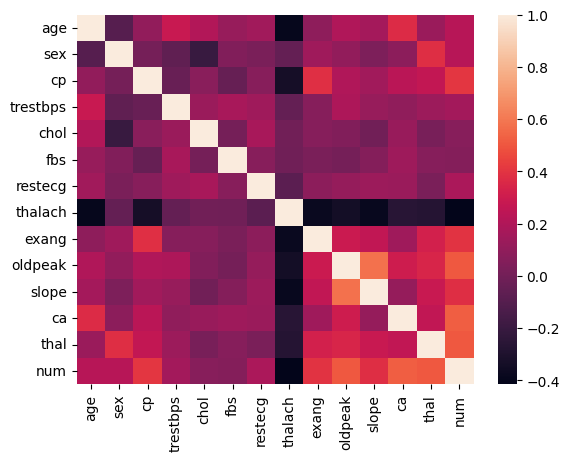

In [402]:
sns.heatmap(df_corr)

# dropping columns with less than 10% correlation

In [403]:
corr_coef_with_target_value = df_corr["num"].values
indexes_with_lessthan_1_corr = []
for i in corr_coef_with_target_value:
  if (abs(i)<0.1):
    indexes_with_lessthan_1_corr.append(indexOf(corr_coef_with_target_value,i))

df.drop(df.columns[indexes_with_lessthan_1_corr], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   restecg   303 non-null    int64  
 5   thalach   303 non-null    int64  
 6   exang     303 non-null    int64  
 7   oldpeak   303 non-null    float64
 8   slope     303 non-null    int64  
 9   ca        303 non-null    float64
 10  thal      303 non-null    float64
 11  num       303 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.5 KB


# Splitting training data into training and testing datasets



In [404]:
y = df['num']
df_X = df.drop(columns=['num'])

In [405]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size = 0.25, random_state = 0, stratify = df["num"])

#Oversampling the data to make the "num" column balanced using the oversample technique


In [406]:
# from sklearn.utils import resample, shuffle
# Train_data = pd.concat([X_train, y_train], axis = 1)

# df_majority = Train_data[Train_data["num"] == 0]
# df_minor_1 = Train_data[Train_data["num"] == 1]
# df_minor_2 = Train_data[Train_data["num"] == 2]
# df_minor_3 = Train_data[Train_data["num"] == 3]
# df_minor_4 = Train_data[Train_data["num"] == 4]

# majority_size = df_majority["num"].count()

# df_minor_1_upsampled = resample(df_minor_1, n_samples = majority_size, replace = True, random_state = 0)
# df_minor_2_upsampled = resample(df_minor_2, n_samples = majority_size, replace = True, random_state = 0)
# df_minor_3_upsampled = resample(df_minor_3, n_samples = majority_size, replace = True, random_state = 0)
# df_minor_4_upsampled = resample(df_minor_4, n_samples = majority_size, replace = True, random_state = 0)

# Train_data = pd.concat([df_majority, df_minor_1_upsampled, df_minor_2_upsampled, df_minor_3_upsampled, df_minor_4_upsampled])
# Train_data = shuffle(Train_data)
# Train_data.reset_index(inplace = True, drop = True)


# X_train = Train_data.drop(columns = ["num"])
# y_train = Train_data["num"]

In [407]:
# X_train

In [408]:
# y_train

#Oversampling the data to make the "num" column balanced using SMOTE technique


In [409]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [410]:
X_train

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal
0,55,0,2,132,0,166,0,1.200000,1,0.000000,3.0
1,62,0,4,140,2,157,0,1.200000,2,0.000000,3.0
2,54,1,4,110,2,108,1,0.000000,2,1.000000,3.0
3,51,1,3,94,0,154,1,0.000000,1,1.000000,7.0
4,64,1,1,110,2,144,1,1.800000,2,0.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...
335,57,0,4,150,2,143,0,3.435318,2,1.789966,7.0
336,55,1,4,161,2,140,0,0.843271,2,1.432712,7.0
337,60,0,3,131,2,159,0,3.250039,2,2.000053,7.0
338,50,1,4,148,2,128,0,2.589926,2,0.100740,7.0


In [411]:
y_train

,num
0,0
1,0
2,3
3,0
4,0
...,...
335,4
336,4
337,4
338,4


#Data scaling

In [412]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [413]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [414]:
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

#Trainnig Logistic regression model



In [415]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear',random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [416]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[37  2  0  0  2]
 [ 8  1  0  0  5]
 [ 2  2  0  0  5]
 [ 0  1  1  0  7]
 [ 0  0  0  0  3]]


0.5394736842105263

###Testing model for overfitting

In [417]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)


[[112   2   0   0   9]
 [ 20   5   0   0  16]
 [  5   1   1   2  18]
 [  1   4   1   0  20]
 [  2   1   0   0 120]]


0.7

###Grid search






In [418]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'C': [0.25, 0.5, 0.75, 1],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2'],
    'max_iter': [100, 200, 300]
}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1,
                           verbose = 2)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_base_classifier = grid_search.best_estimator_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Accuracy: 67.66 %
Best Parameters: {'C': 0.75, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


###building model with best parameters

In [419]:
best_base_classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = best_base_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[38  2  0  0  1]
 [ 7  2  0  1  4]
 [ 2  2  0  0  5]
 [ 0  1  2  0  6]
 [ 0  0  0  0  3]]


0.5657894736842105

#Training a knn model




In [420]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [421]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[36  2  0  1  2]
 [ 7  2  1  2  2]
 [ 4  1  0  2  2]
 [ 1  2  1  2  3]
 [ 0  0  0  1  2]]


0.5526315789473685

###testing for overfiting

In [422]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)


[[112   3   0   2   6]
 [ 17   9   2   4   9]
 [  6   4   7   4   6]
 [  5   2   5   8   6]
 [  0   1   2   0 120]]


0.7529411764705882

###Grid search

In [423]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_neighbors': list(range(1, 32)),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = 1,
                           verbose = 2)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_base_classifier = grid_search.best_estimator_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Fitting 3 folds for each of 186 candidates, totalling 558 fits
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=2, we

###building model with best parameters

In [424]:
best_base_classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = best_base_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[36  4  1  0  0]
 [ 5  7  1  1  0]
 [ 4  4  0  0  1]
 [ 1  5  2  0  1]
 [ 0  1  0  0  2]]


0.5921052631578947

#Training a Descision Tree model

In [425]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [426]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[34  5  0  2  0]
 [ 8  4  2  0  0]
 [ 2  4  2  0  1]
 [ 0  3  3  0  3]
 [ 0  0  3  0  0]]


0.5263157894736842

###Grid search


In [427]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50]
}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_base_classifier = grid_search.best_estimator_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Accuracy: 64.72 %
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'splitter': 'best'}


###building model with best parameters

In [428]:
best_base_classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = best_base_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[33  8  0  0  0]
 [ 8  1  4  1  0]
 [ 1  5  2  1  0]
 [ 0  3  3  1  2]
 [ 0  0  1  1  1]]


0.5

#XG boost model

In [429]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [430]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[39  2  0  0  0]
 [ 8  1  3  2  0]
 [ 3  3  2  1  0]
 [ 0  5  0  2  2]
 [ 0  1  1  0  1]]


0.5921052631578947

###Hyperparam tuning with optuna

In [431]:
!pip install optuna


In [432]:
import optuna
import xgboost as xgb
from sklearn.metrics import accuracy_score


def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0)
    }

    xgb_model = xgb.XGBClassifier(**params)
    xgb_model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        verbose=False
    )
    y_pred = xgb_model.predict(X_test)
    return 1 - accuracy_score(y_test, y_pred)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print("Best hyperparameters: ", study.best_params)


[I 2024-08-13 15:40:39,530] A new study created in memory with name: no-name-cef1e975-2d62-4352-a887-b8c733ca07dd
[I 2024-08-13 15:40:41,079] Trial 0 finished with value: 0.42105263157894735 and parameters: {'learning_rate': 0.18137054099172514, 'max_depth': 9, 'n_estimators': 129, 'colsample_bytree': 0.9110864703352364, 'subsample': 0.9444833377151554}. Best is trial 0 with value: 0.42105263157894735.
[I 2024-08-13 15:40:41,845] Trial 1 finished with value: 0.39473684210526316 and parameters: {'learning_rate': 0.10999594775129873, 'max_depth': 9, 'n_estimators': 54, 'colsample_bytree': 0.9948050486166096, 'subsample': 0.8268996012167767}. Best is trial 1 with value: 0.39473684210526316.
[I 2024-08-13 15:40:42,167] Trial 2 finished with value: 0.39473684210526316 and parameters: {'learning_rate': 0.03483707448090788, 'max_depth': 6, 'n_estimators': 119, 'colsample_bytree': 0.8623948338261541, 'subsample': 0.6731646190640955}. Best is trial 1 with value: 0.39473684210526316.
[I 2024-08-

Best hyperparameters:  {'learning_rate': 0.04561085018944083, 'max_depth': 5, 'n_estimators': 88, 'colsample_bytree': 0.8732983991725083, 'subsample': 0.9473000785742605}


###building model with best parameters

In [433]:
model = xgb.XGBClassifier(**study.best_params)

model.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[40  1  0  0  0]
 [ 7  3  3  1  0]
 [ 3  2  3  1  0]
 [ 1  5  0  1  2]
 [ 0  0  1  0  2]]


0.6447368421052632

###test for overfitting

In [434]:
y_train_pred = model.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)

[[123   0   0   0   0]
 [  2  39   0   0   0]
 [  0   0  26   0   1]
 [  0   0   0  26   0]
 [  0   0   0   0 123]]


0.9911764705882353

#Training a random forest model

In [435]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [436]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[39  2  0  0  0]
 [ 9  3  0  1  1]
 [ 3  4  1  0  1]
 [ 1  5  0  1  2]
 [ 0  0  0  1  2]]


0.6052631578947368

###Get most important features

<Axes: >

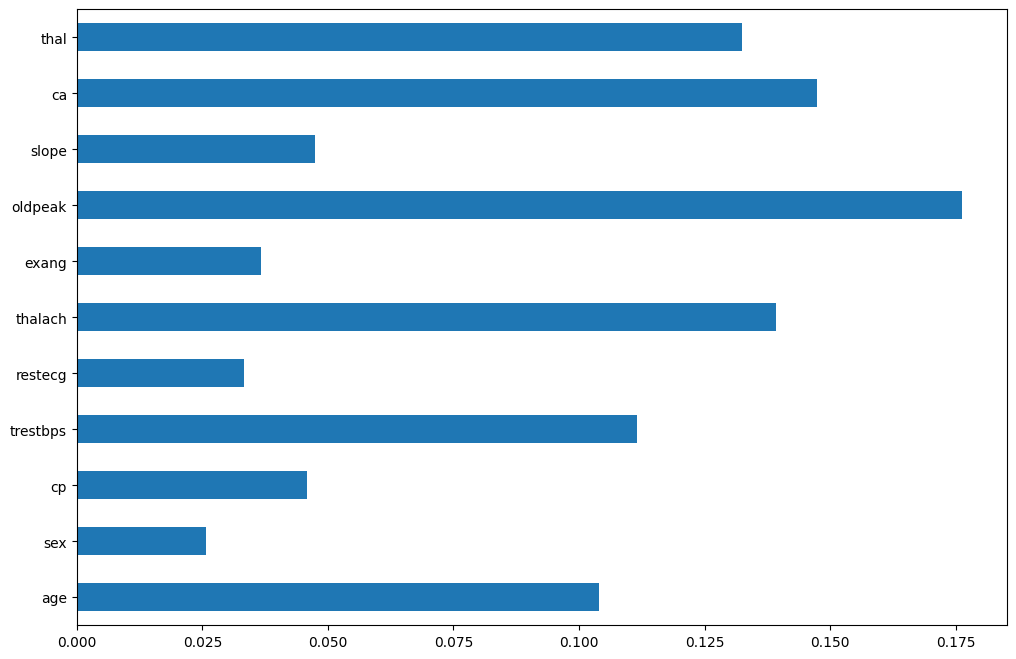

In [437]:
importances = classifier.feature_importances_
df_importances = pd.Series(importances, index = df_X.columns)
indices = np.argsort(importances)[::-1]
features = df_X.columns
features
df_importances.plot(kind='barh', figsize=(12,8))

###Grid search

In [438]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'max_features':['sqrt', 'log2', None]
}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1,
                           verbose = 2)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_base_classifier = grid_search.best_estimator_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Accuracy: 72.94 %
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}


###building model with best parameters

In [439]:
best_base_classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = best_base_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[39  2  0  0  0]
 [ 8  4  0  1  1]
 [ 5  1  2  1  0]
 [ 2  3  1  1  2]
 [ 0  0  0  1  2]]


0.631578947368421

#Training a svm model

In [440]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 110)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=110)

In [441]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[39  2  0  0  0]
 [ 7  2  0  1  4]
 [ 1  1  0  0  7]
 [ 1  1  2  0  5]
 [ 0  1  0  0  2]]
Accuracy Score:
0.5657894736842105


###test for overfitting

In [442]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)


[[113   1   0   0   9]
 [ 19   8   0   0  14]
 [  5   2   3   2  15]
 [  2   4   1   1  18]
 [  0   0   0   0 123]]


0.7294117647058823

###Grid search

In [443]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'C': [0.25, 0.5, 0.75, 1],
    'kernel': ['linear'],
    'gamma': [0,0.1, 0.5, 1, 2, 5]
}

grid_search = GridSearchCV(estimator = classifier,param_grid = parameters,scoring = 'accuracy',cv = 3,n_jobs = -1,verbose = 2)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_base_classifier = grid_search.best_estimator_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Accuracy: 70.00 %
Best Parameters: {'C': 1, 'gamma': 0, 'kernel': 'linear'}


In [444]:
y_pred = best_base_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[39  2  0  0  0]
 [ 7  2  0  1  4]
 [ 1  1  0  0  7]
 [ 1  1  2  0  5]
 [ 0  1  0  0  2]]
Accuracy Score:
0.5657894736842105


#model bagging classifier


In [455]:
from sklearn.ensemble import BaggingClassifier
classifier = BaggingClassifier(estimator = LogisticRegression())
classifier.fit(X_train, y_train)

BaggingClassifier(estimator=LogisticRegression())

0.5526315789473685


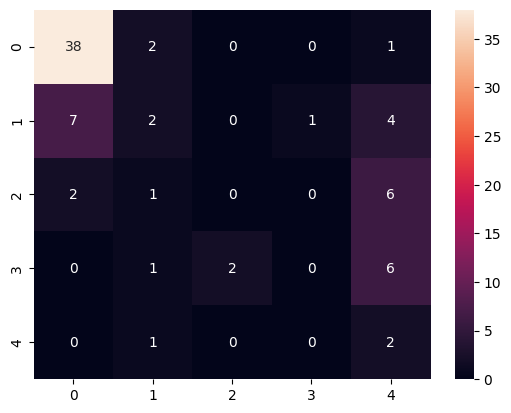

In [456]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
print(accuracy_score(y_test, y_pred))

In [457]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'bootstrap': [True]
}

grid_search = GridSearchCV(estimator=classifier,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose = 2)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_base_classifier = grid_search.best_estimator_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Accuracy: 66.76 %
Best Parameters: {'bootstrap': True, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}


###building model with best parameters

In [458]:
best_base_classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = best_base_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[38  2  0  0  1]
 [ 7  2  0  1  4]
 [ 2  2  0  0  5]
 [ 0  1  1  1  6]
 [ 0  0  1  0  2]]


0.5657894736842105

# Training naive bayes model

In [459]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [460]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[36  4  1  0  0]
 [ 5  5  3  0  1]
 [ 0  5  1  1  2]
 [ 0  2  3  0  4]
 [ 0  0  1  0  2]]


0.5789473684210527

###test for overfitting

In [461]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)


[[105  10   3   0   5]
 [ 16  11   5   1   8]
 [  2   3   5   3  14]
 [  2   3   7   8   6]
 [  1  12   1   1 108]]


0.6970588235294117

#Training extra trees model

In [462]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)


ExtraTreesClassifier(random_state=0)

In [463]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[37  3  1  0  0]
 [ 6  6  0  1  1]
 [ 4  3  1  1  0]
 [ 2  1  2  3  1]
 [ 0  1  0  0  2]]


0.6447368421052632

#building an ANN

In [464]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

size_input_layer = X_train.shape[1]
size_hidden_layer = (2*size_input_layer // 3) + 2

model = Sequential([
    Dense(units=size_hidden_layer, input_shape=(size_input_layer,), activation='relu'),

    Dense(units=1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [465]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=3,
    epochs=100,
    validation_split = 0.1,
    shuffle=True,
    verbose=2
)

Epoch 1/100
102/102 - 1s - 14ms/step - accuracy: 0.1961 - loss: 0.0474 - val_accuracy: 0.0000e+00 - val_loss: -3.5345e+00
Epoch 2/100
102/102 - 0s - 4ms/step - accuracy: 0.1340 - loss: -1.9451e+00 - val_accuracy: 0.0000e+00 - val_loss: -9.7041e+00
Epoch 3/100
102/102 - 0s - 3ms/step - accuracy: 0.1340 - loss: -4.0565e+00 - val_accuracy: 0.0000e+00 - val_loss: -1.6876e+01
Epoch 4/100
102/102 - 0s - 3ms/step - accuracy: 0.1340 - loss: -6.5222e+00 - val_accuracy: 0.0000e+00 - val_loss: -2.5671e+01
Epoch 5/100
102/102 - 0s - 3ms/step - accuracy: 0.1340 - loss: -9.5345e+00 - val_accuracy: 0.0000e+00 - val_loss: -3.6872e+01
Epoch 6/100
102/102 - 0s - 3ms/step - accuracy: 0.1340 - loss: -1.3184e+01 - val_accuracy: 0.0000e+00 - val_loss: -4.9320e+01
Epoch 7/100
102/102 - 0s - 3ms/step - accuracy: 0.1340 - loss: -1.7368e+01 - val_accuracy: 0.0000e+00 - val_loss: -6.4041e+01
Epoch 8/100
102/102 - 0s - 3ms/step - accuracy: 0.1340 - loss: -2.2156e+01 - val_accuracy: 0.0000e+00 - val_loss: -8.0629e

In [466]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[ 0 41  0  0  0]
 [ 0 14  0  0  0]
 [ 0  9  0  0  0]
 [ 0  9  0  0  0]
 [ 0  3  0  0  0]]


0.18421052631578946